# PCA Sweep Data Analysis

This notebook analyzes the `pca_sweep_summary_sorted.csv` data, focusing on frame sizes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load Data

In [2]:
df = pd.read_csv('pca_sweep_summary_scaled.csv')
print(f"Dataset Shape: {df.shape}")
df.head(20)

Dataset Shape: (17184, 4)


,frame,components,mse,size_bytes
0,1,5,1006.447271,8448.0
1,1,10,573.714612,16128.0
2,1,15,398.013950,23808.0
3,1,20,293.386251,31488.0
4,1,25,225.572032,39168.0
5,1,30,179.826587,46848.0
6,1,35,146.427491,54528.0
7,1,40,121.757707,62208.0
8,1,45,101.897005,69888.0
9,1,50,85.657189,77568.0


## Convert Size to KB

In [3]:
# Convert bytes to KB
df['size_kb'] = df['size_bytes'] / 1024
df.head()

,frame,components,mse,size_bytes,size_kb
0,1,5,1006.447271,8448.0,8.25
1,1,10,573.714612,16128.0,15.75
2,1,15,398.013950,23808.0,23.25
3,1,20,293.386251,31488.0,30.75
4,1,25,225.572032,39168.0,38.25


## Frame Size Statistics (KB)

Key statistics for frame sizes across the entire dataset.

In [4]:
# Calculate mean, min, max frame sizes
mean_size_kb = df['size_kb'].mean()
min_size_kb = df['size_kb'].min()
max_size_kb = df['size_kb'].max()

print("=" * 50)
print("FRAME SIZE STATISTICS (KB)")
print("=" * 50)
print(f"Mean Frame Size: {mean_size_kb:.2f} KB")
print(f"Min Frame Size:  {min_size_kb:.2f} KB")
print(f"Max Frame Size:  {max_size_kb:.2f} KB")
print("=" * 50)

FRAME SIZE STATISTICS (KB)
Mean Frame Size: 64.50 KB
Min Frame Size:  8.25 KB
Max Frame Size:  120.75 KB


In [5]:
# Additional statistics
print("\nDetailed Statistics:")
print(df['size_kb'].describe())


Detailed Statistics:
count    17184.000000
mean        64.500000
std         34.574298
min          8.250000
25%         36.375000
50%         64.500000
75%         92.625000
max        120.750000
Name: size_kb, dtype: float64


## Size Distribution by PCA Components

In [6]:
# Group by components and show size statistics
size_by_components = df.groupby('components')['size_kb'].agg(['mean', 'min', 'max', 'std', 'count'])
size_by_components.columns = ['Mean (KB)', 'Min (KB)', 'Max (KB)', 'Std (KB)', 'Count']
print("Frame Size Statistics by Number of PCA Components:")
size_by_components

Frame Size Statistics by Number of PCA Components:


,Mean (KB),Min (KB),Max (KB),Std (KB),Count
components,,,,,
5,8.25,8.25,8.25,0.0,1074
10,15.75,15.75,15.75,0.0,1074
15,23.25,23.25,23.25,0.0,1074
20,30.75,30.75,30.75,0.0,1074
25,38.25,38.25,38.25,0.0,1074
30,45.75,45.75,45.75,0.0,1074
35,53.25,53.25,53.25,0.0,1074
40,60.75,60.75,60.75,0.0,1074
45,68.25,68.25,68.25,0.0,1074


## Visualization

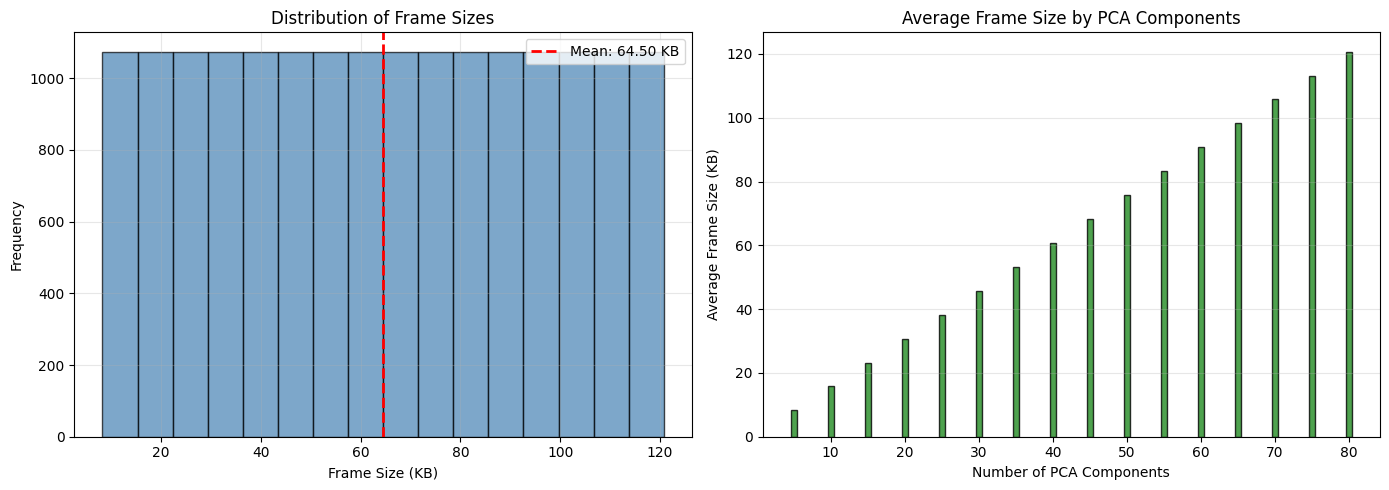

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution of frame sizes
axes[0].hist(df['size_kb'], bins=16, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(mean_size_kb, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_size_kb:.2f} KB')
axes[0].set_xlabel('Frame Size (KB)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Frame Sizes')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Size vs Components
components = df['components'].unique()
avg_size = df.groupby('components')['size_kb'].mean()
axes[1].bar(avg_size.index, avg_size.values, color='forestgreen', edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Number of PCA Components')
axes[1].set_ylabel('Average Frame Size (KB)')
axes[1].set_title('Average Frame Size by PCA Components')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## Summary Table

In [8]:
# Create a summary dataframe
summary = pd.DataFrame({
    'Metric': ['Mean', 'Min', 'Max', 'Median', 'Std Dev'],
    'Size (KB)': [
        df['size_kb'].mean(),
        df['size_kb'].min(),
        df['size_kb'].max(),
        df['size_kb'].median(),
        df['size_kb'].std()
    ]
})
summary['Size (KB)'] = summary['Size (KB)'].round(2)
summary

,Metric,Size (KB)
0,Mean,64.50
1,Min,8.25
2,Max,120.75
3,Median,64.50
4,Std Dev,34.57
